In [ ]:
import pandas as pd
df = pd.read_csv('Final_data.csv')
df1=df.drop('EQE',axis=1)

In [ ]:
y = df['EQE']
x=df1

In [ ]:
splits = range(10)
splits

range(0, 10)

In [ ]:
from time import time
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [ ]:
def model_prime(model_name):
  model = model_name()
  return model


In [ ]:
def fit_model(model,X_train,y_train):
  model = model_prime(model)
  model.fit(X_train,y_train)
  return model

In [ ]:
def evaluate_model(model, X, y_test):
  y_pred = model.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse_val = mean_squared_error(y_test, y_pred, squared=True)
  return r2, mae, rmse_val


In [ ]:
def evaluate_train_model(model, X, y_train):
  y_pred_prime = model.predict(X_train)
  r2 = r2_score(y_train, y_pred_prime)
  mae = mean_absolute_error(y_train, y_pred_prime)
  rmse_val = mean_squared_error(y_train, y_pred_prime, squared=True)
  return r2, mae, rmse_val


In [ ]:
def append_result_df(df, result_dict):
 df_result_appended = df.append(result_dict, ignore_index=True)
 return df_result_appended
 


In [ ]:
def append_model_dict(dic,model_name,model):
  dic[model_name]=model
  return dic


In [ ]:
df_classics = pd.DataFrame(columns=['model_name',
                                   'model_params',
                                    'fit_time',
                                    'r2_train',
                                    'mae_train',
                                    'rmse_train',
                                    'r2_val',
                                    'mae_val',
                                    'rmse_val'])
df_classics

,model_name,model_params,fit_time,r2_train,mae_train,rmse_train,r2_val,mae_val,rmse_val


In [ ]:
# Gradient Boosting Method

In [ ]:
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  model = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 20, min_samples_split= 0.5, n_estimators= 150)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
 
  df_splits = append_result_df(df_splits, result_dict)



  
  

0.9934535217963656 0.7468806905422635


<Figure size 432x432 with 0 Axes>

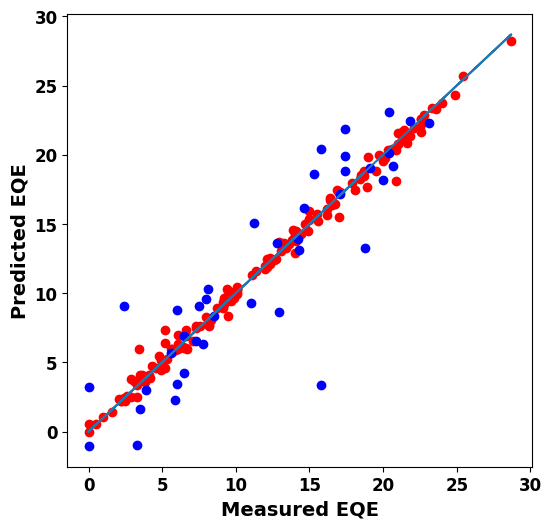

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 77,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test =  scaler.fit_transform(x_test)
#X_predict = normalize(scaler.fit_transform(x_predict))
model = GradientBoostingRegressor(learning_rate= 0.2, max_depth= 20, min_samples_split= 0.5, n_estimators= 150, random_state=77)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(6,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('Gradient_boosting_plot', dpi=100, figsize=(6,6))
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})


In [ ]:
# Xtreme Graident Boosting Method


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor, plot_importance

In [ ]:
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  model = XGBRegressor(objective ='reg:squarederror',booster = 'gbtree', max_depth=3, learning_rate=0.2, n_estimators=90, min_leaf_split=0.1, min_samples_split=0.1, reg_alpha=7.66e-2, reg_lambda=1.0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
 
  df_splits = append_result_df(df_splits, result_dict)

0.3283261830373697 0.9927082130098982 18.4131487218975 0.5837989908161222


0.9945496120281091 0.8150921183887446


<Figure size 432x432 with 0 Axes>

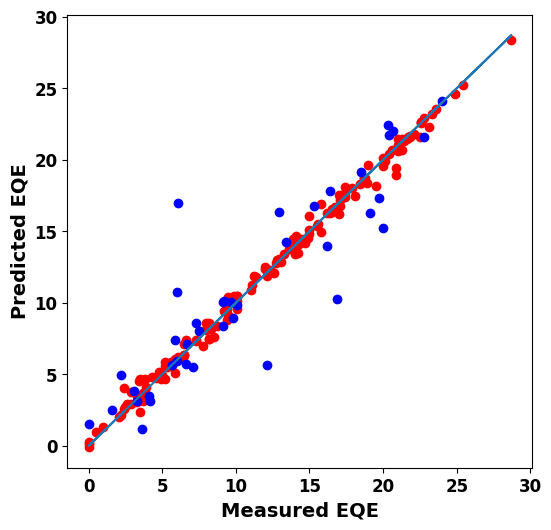

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 52,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
  #X_predict = normalize(scaler.fit_transform(x_predict))
model = XGBRegressor(objective ='reg:squarederror',booster = 'gbtree', max_depth=3, learning_rate=0.2, n_estimators=90, min_leaf_split=0.1, min_samples_split=0.1, reg_alpha=7.66e-2, reg_lambda=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(6,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('Xtreme_Gradient_boosting_plot', dpi=100, figsize=(6,6))
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})


In [ ]:
# Light Graident Boosting Method

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  model = LGBMRegressor(boosting_type='gbdt', max_depth=3, learning_rate=0.2, n_estimators=90, reg_alpha=0.02, reg_lambda=1.0)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
 
  df_splits = append_result_df(df_splits, result_dict)

0.9514380489266023 0.7711498617336658


<Figure size 432x432 with 0 Axes>

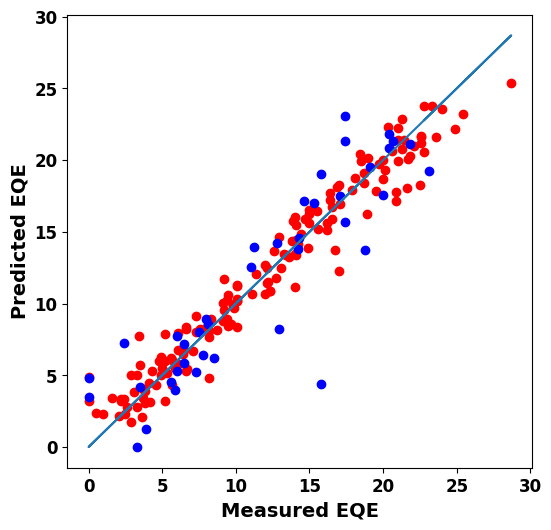

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 77,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
  #X_predict = normalize(scaler.fit_transform(x_predict))
model = LGBMRegressor(boosting_type='gbdt', max_depth=3, learning_rate=0.2, n_estimators=90, reg_alpha=0.02, reg_lambda=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(6,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('LightGBM_boosting_plot', dpi=100, figsize=(6,6))
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

In [ ]:
# Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  model = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
  df_splits = append_result_df(df_splits, result_dict)

1.0 0.8748698388096152


<Figure size 720x432 with 0 Axes>

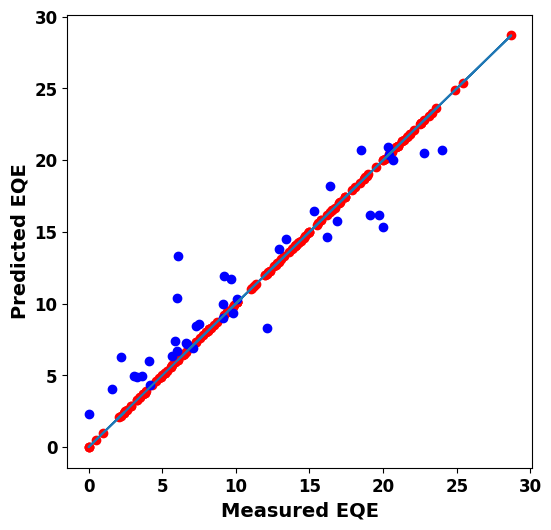

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 52,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
  #X_predict = normalize(scaler.fit_transform(x_predict))
model = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(10,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('RF_plot', dpi=100, figsize=(6,6))
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})




#fig = plt.figure(figsize=(7,6), dpi=100)
#plt.scatter(xPlot,y1Plot,color='red')
#plt.plot(xPlot,xPlot)
#plt.scatter(x1Plot,yPlot,color='green')
#plt.xlabel('DFT Energy(eV)', fontsize=12)
#plt.ylabel('Predicted Energy(eV)',fontsize=12)
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})



In [ ]:
# Support Vector Regression Model

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  #model = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
 # model = svm.SVR(C = 0.01, gamma = 0.6, kernel = 'poly', degree = 3)
  model = svm.LinearSVR()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
  df_splits = append_result_df(df_splits, result_dict)

0.6605565599540977 0.4730865087205903


<Figure size 720x432 with 0 Axes>

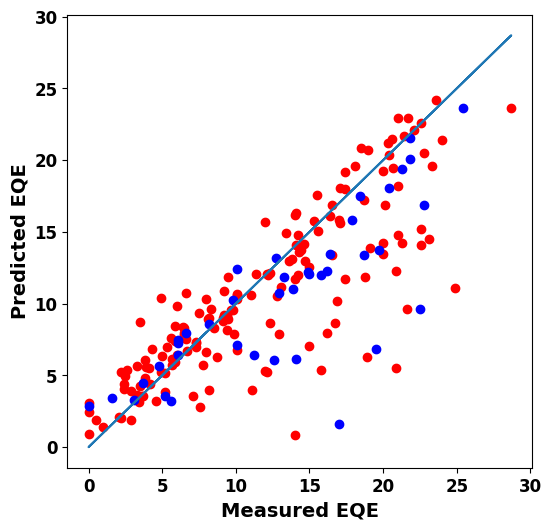

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 7,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
  #X_predict = normalize(scaler.fit_transform(x_predict))
#model = svm.SVR( C = 0.1, gamma = 0.6, kernel = 'poly', degree = 3)
model = svm.LinearSVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(10,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('SVR_plot', dpi=100, figsize=(6,6))
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})




#fig = plt.figure(figsize=(7,6), dpi=100)
#plt.scatter(xPlot,y1Plot,color='red')
#plt.plot(xPlot,xPlot)
#plt.scatter(x1Plot,yPlot,color='green')
#plt.xlabel('DFT Energy(eV)', fontsize=12)
#plt.ylabel('Predicted Energy(eV)',fontsize=12)
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})


In [ ]:
# K Neighbour Regression Model  

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
df_splits = pd.DataFrame(columns=['random_state','r2_train','mae_train','rmse_train','r2_test','mae_test','rmse_test'])
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = i,shuffle=True)
  scaler=StandardScaler()
  X_train = normalize(scaler.fit_transform(x_train))
  X_test = normalize(scaler.fit_transform(x_test))
  #X_predict = normalize(scaler.fit_transform(x_predict))
  #model = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
 # model = svm.SVR(C = 0.01, gamma = 0.6, kernel = 'poly', degree = 3)
  model = KNeighborsRegressor(n_neighbors=3)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_prime = model.predict(X_train)
  r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
  r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
  result_dict = {
      'random_state': i,
      'r2_train': r2_train,
      'mae_train': mae_train,
      'rmse_train': rmse_train,
      'r2_test': r2_test,
      'mae_test': mae_test,
      'rmse_test': rmse_test
       }
  df_splits = append_result_df(df_splits, result_dict)

0.8240866673008987 0.758445513908329


<Figure size 720x432 with 0 Axes>

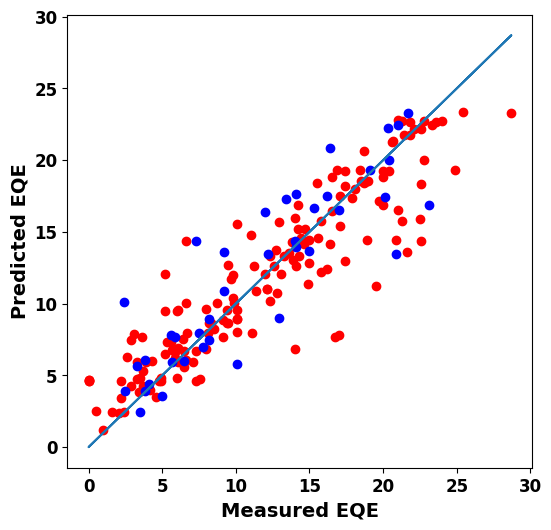

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state = 8,shuffle=True)
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)
  #X_predict = normalize(scaler.fit_transform(x_predict))
#model = svm.SVR( C = 0.1, gamma = 0.6, kernel = 'poly', degree = 3)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prime = model.predict(X_train)
r2_train, mae_train, rmse_train = evaluate_train_model(model, X_train, y_train)
r2_test, mae_test, rmse_test = evaluate_model(model, X_test, y_test) 
print(r2_train,r2_test)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fig = plt.figure(figsize=(10,6))
mpl.rcParams['figure.figsize']
import matplotlib.pyplot as plt
xPlot = y_train
x1Plot = y_test
yPlot = y_pred
y1Plot = y_pred_prime
fig = plt.figure(figsize=(6,6), dpi=100)
plt.scatter(xPlot,y1Plot,color='red') # train
plt.plot(xPlot,xPlot)
plt.scatter(x1Plot,yPlot,color='blue') # test
plt.xlabel('Measured EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.ylabel('Predicted EQE', fontname = "Times New Roman", size = 14, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.savefig('KNN_plot', dpi=100, figsize=(6,6))

#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})




#fig = plt.figure(figsize=(7,6), dpi=100)
#plt.scatter(xPlot,y1Plot,color='red')
#plt.plot(xPlot,xPlot)
#plt.scatter(x1Plot,yPlot,color='green')
#plt.xlabel('DFT Energy(eV)', fontsize=12)
#plt.ylabel('Predicted Energy(eV)',fontsize=12)
#plt.text( 4, 'Train R2', style='italic', fontsize=12, 
    #   bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
